In [ ]:
!pip install plotly

In [ ]:
#Twiter Stock Market Analysis

#Importing of the libraries

import pandas as pd
import numpy as np

import plotly.graph_objects as go
import plotly.express as px

import plotly.io as pio

pio.templates.default = "plotly_white"


In [ ]:
#Read the data and display the first 100 rows from the data
data = pd.read_excel("/content/TWTR.xlsx")
data.head(100)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0
1,2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0
...,...,...,...,...,...,...,...
95,2014-03-27,45.090000,46.400002,43.310001,46.320000,46.320000,15507597.0
96,2014-03-28,46.650002,47.340000,45.700001,47.299999,47.299999,9610491.0
97,2014-03-31,47.549999,47.750000,46.430000,46.669998,46.669998,5794497.0
98,2014-04-01,46.709999,47.590000,46.180000,46.980000,46.980000,6916147.0


In [ ]:
# 2)	Give the column insights

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2264 non-null   datetime64[ns]
 1   Open       2259 non-null   float64       
 2   High       2259 non-null   float64       
 3   Low        2259 non-null   float64       
 4   Close      2259 non-null   float64       
 5   Adj Close  2259 non-null   float64       
 6   Volume     2259 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 123.9 KB


In [ ]:
# 3)	Check whether this dataset contains any null values or not if it is there then remove the null values from it

data.isnull().sum()



Date         0
Open         5
High         5
Low          5
Close        5
Adj Close    5
Volume       5
dtype: int64

In [ ]:
data = data.dropna()



In [ ]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# 4)	Find the statistical description of the data.

data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2259,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2.259000e+03
mean,2018-05-04 20:18:48.286852608,36.020286,36.699881,35.339465,36.003625,36.003625,2.175186e+07
min,2013-11-07 00:00:00,13.950000,14.220000,13.725000,14.010000,14.010000,0.000000e+00
25%,2016-02-06 12:00:00,25.550000,26.215001,24.912501,25.410000,25.410000,1.233530e+07
50%,2018-05-04 00:00:00,35.419998,36.099998,34.820000,35.490002,35.490002,1.691305e+07
75%,2020-08-01 12:00:00,44.205000,45.015000,43.327501,44.135000,44.135000,2.428082e+07
max,2022-10-27 00:00:00,78.360001,80.750000,76.050003,77.629997,77.629997,2.692131e+08
std,NaN,14.118463,14.372057,13.828724,14.089989,14.089989,1.909988e+07


In [ ]:
#5)Find the missing values in the data
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
#6)	Give me the Z-test O/R T-test over High, low, and close columns and see if the null hypothesis gets rejected or accepted
import statistics as st
from statsmodels.stats import weightstats as stests
from numpy import random

high = data['High']
print("High Data :", high)

high_mean = st.mean(high)
print("mean of the high columns:",high_mean)

high_stdev = st.stdev(high)
print("Standard Deviation of the data :" , high_stdev)

ztest, pval = stests.ztest(high, value=30)
print("Z_test Score: ",ztest )
print("P-Value: ", pval)

if pval<0.05:
  print("Reject Null Hypothesis:")
else:
  print("Accept the null hypothesis:")

High Data : 0       50.090000
1       46.939999
2       43.000000
3       43.779999
4       42.869999
          ...    
2254    50.750000
2255    51.860001
2256    53.180000
2257    53.500000
2258    54.000000
Name: High, Length: 2259, dtype: float64
mean of the high columns: 36.69988069278442
Standard Deviation of the data : 14.372056692309659
Z_test Score:  22.15676048174423
P-Value:  8.978177265940086e-109
Reject Null Hypothesis:


In [ ]:
Low = data['Low']
print("Low Data :", Low)

Low_mean = st.mean(Low)
print("mean of the Low columns:",Low_mean)

Low_stdev = st.stdev(Low)
print("Standard Deviation of the data :" , Low_stdev)

ztest, pval = stests.ztest(Low, value=30)
print("Z_test Score: ",ztest )
print("P-Value: ", pval)

if pval<0.05:
  print("Reject Null Hypothesis:")
else:
  print("Accept the null hypothesis:")

Low Data : 0       44.000000
1       40.685001
2       39.400002
3       41.830002
4       40.759998
          ...    
2254    49.549999
2255    50.520000
2256    52.200001
2257    52.770000
2258    53.700001
Name: Low, Length: 2259, dtype: float64
mean of the Low columns: 35.339464800354136
Standard Deviation of the data : 13.828723572649182
Z_test Score:  18.35159210972168
P-Value:  3.205795428365976e-75
Reject Null Hypothesis:


In [ ]:
Close = data['Close']
print("Close Data :", Close)

#Close_mean = st.mean(Close)
#print("mean of the high columns:",Close_mean)

#Close_stdev = st.stdev(Close)
#print("Standard Deviation of the data :" , Close_stdev)

ztest, pval = stests.ztest(Close, value=30)
print("Z_test Score: ",ztest )
print("P-Value: ", pval)

if pval<0.05:
  print("Reject Null Hypothesis:")
else:
  print("Accept the null hypothesis:")

Close Data : 0       44.900002
1       41.650002
2       42.900002
3       41.900002
4       42.599998
          ...    
2254    49.889999
2255    51.520000
2256    52.779999
2257    53.349998
2258    53.700001
Name: Close, Length: 2259, dtype: float64
Z_test Score:  20.251679995652125
P-Value:  3.433291673809823e-91
Reject Null Hypothesis:


In [ ]:
# 7)	By using ANOVA find the Fvalue and Pvalue from the data and see its Acceptance and rejection of the Null hypothesis.


import scipy.stats as ssf

grp1 = data['High']
grp2 = data['Low']
grp1.head()
grp2.head()


F_val , P_val = ssf.f_oneway(grp1, grp2)
print("F-Value :", F_val)
print("P-Value : ", P_val)

if P_val < 0.05:
  print("Reject the Null Hypothesis")
else:
  print("Accept the Null Hypothesis")

F-Value : 10.510084066032649
P-Value :  0.0011958722702637046
Reject the Null Hypothesis


In [ ]:
# 8)	Check if the data is dependent or independent by using the chi-square method.
# Dependent - Reject Null Hypothesis

# Indpendent - Accept the Null Hypothesis


datas = {"High":data['High'] ,
         "Low":data['Low']}
# print(datas)
chisq , pval = ssf.chisquare(datas['Low'])
alpha = 0.05

print("Chi-Square Values :", chisq)
print("P-Valuess :" , pval)

if pval < alpha:
  print("Dependent Data ")
else:
  print("Independent Data ")

Chi-Square Values : 12218.788864355833
P-Valuess : 0.0
Dependent Data 


In [ ]:
#10) Write the insights which you have got  from the above  tests
"""In that test null hypothesis get rejected because we don't find any
 kind of inferences in high columns there is no any kind of inferences
 we have made then the  sample distibution which we have tack around
 that is 10 distribution while comparing with whole data we have check
 there is no statical and measure difference is found therefor it is showing
  null hypothesis"""



SyntaxError: unterminated string literal (detected at line 2) (<ipython-input-2-86f0cec64edc>, line 2)

In [ ]:
#11)	Show the Twitter stock prices over the years  and give a conclusion

figure = go.Figure(data = [go.Candlestick(
    x = data['Date'],
    open = data['Open'],
    high = data['High'],
    low = data['Low'],
    close = data['Close']


)])

figure.update_layout(
    title = "Twitter Stock Market Prices Over the Years" ,
    xaxis_rangeslider_visible = True
)

figure.show()


In [ ]:
# 12)	Now compare the close vs date column for Twitter prices over the years.

figure = px.bar(data , x = "Date" ,y = "Close" , color = "Close")

figure.update_xaxes(rangeslider_visible = True)

figure.show()

In [ ]:
# 13)	Assign buttons to control time periods.  Add the  buttons to analyze the stock prices of Twitter in different time periods



figure = px.bar(data , x = "Date" ,y = "Close" , color = "Close")

figure.update_xaxes(rangeslider_visible = True)

figure.update_layout(
    title = "Twitter Stock Prices Over the Years"
)

figure.update_xaxes(

        rangeselector = dict(

                  buttons = list([

                                  dict(count = 1 , label= '1m' , step = "month" , stepmode = "backward"),
                                  dict(count = 6 , label= '6m' , step = "month" , stepmode = "backward"),
                                  dict(count = 3 , label= '3m' , step = "month" , stepmode = "backward"),
                                  dict(count = 1 , label= '1y' , step = "year" , stepmode = "backward"),
                                  dict(count = 2 , label= '2y' , step = "year" , stepmode = "backward"),
                                  dict(step = 'all'),


                  ])
        )
)

figure.show()

In [ ]:
# 14)	Give the complete timeline of Twitter in the stock market. (Line Graph)


data['Date'] = pd.to_datetime(data["Date"] , format = '%Y-%m-%d')

data['Year'] = data['Date'].dt.year

data['Month'] = data['Date'].dt.month

fig = px.line(data ,

              x = "Month",
              y = "Close" ,
              color = 'Year',
              title = "Complete timeline of Twitter"
)

fig.show()

In [ ]:
#15)	Show the quartile, inter-quartile Lower, Median, and Upper Quartile on the given dataset  you can use any three columns for that (Box-Plot)


import statistics as st
import matplotlib.pyplot as plt
#InterQuartile Range :




Low = data['Low']
print("LOW Data :", Low)

Low_mean = st.mean(Low)
print("mean of the LOW columns:",Low_mean)

q = st.quantiles(Low) #default 4
# IQR1 = q[3] - q[1] # this is not working

IQR2 = q[2] - q[0]

# print("InterQuartile Range: " , IQR1)
print(" Low InterQuartile Range: " , IQR2)

Low_Median = st.median(Low)
print("Median :" ,Low_Median)
print('*'*50)


#----------------------------------------------------------------------------------------
#Upper quartile

import statistics as st
#InterQuartile Range :
      # IQR : Q3-Q1

#data = pd.read_excel("/content/TWTR.xlsx")
#data.head(100)




High = data['High']
print("High Data :", High)

High_mean = st.mean(Low)
print("mean of the High columns:",High_mean)

q1 = st.quantiles(High) #default 4
# IQR1 = q[3] - q[1] # this is not working

IQR3 = q1[2] - q1[0]

# print("InterQuartile Range: " , IQR1)
print(" High InterQuartile Range: " , IQR3)






LOW Data : 0       44.000000
1       40.685001
2       39.400002
3       41.830002
4       40.759998
          ...    
2254    49.549999
2255    50.520000
2256    52.200001
2257    52.770000
2258    53.700001
Name: Low, Length: 2259, dtype: float64
mean of the LOW columns: 35.339464800354136
 Low InterQuartile Range:  18.420002
Median : 34.82
**************************************************
High Data : 0       50.090000
1       46.939999
2       43.000000
3       43.779999
4       42.869999
          ...    
2254    50.750000
2255    51.860001
2256    53.180000
2257    53.500000
2258    54.000000
Name: High, Length: 2259, dtype: float64
mean of the High columns: 35.339464800354136
 High InterQuartile Range:  18.829997999999996


In [ ]:
#15)	Show the quartile, inter-quartile Lower, Median, and Upper Quartile on the given dataset  you can use any three columns for that (Box-Plot)

Lower Quartile:
Open    25.550000
High    26.215001
Low     24.912501
Name: 0.25, dtype: float64

Median:
Open    35.419998
High    36.099998
Low     34.820000
Name: 0.5, dtype: float64

Upper Quartile:
Open    44.205000
High    45.015000
Low     43.327501
Name: 0.75, dtype: float64

Interquartile Range:
Open    18.655000
High    18.799999
Low     18.415001
dtype: float64


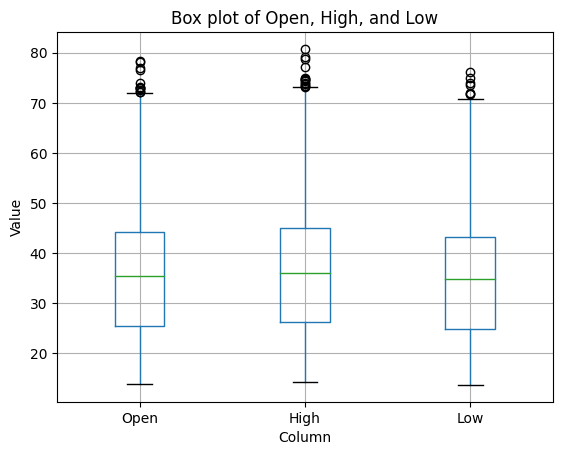

In [ ]:
selected_columns = ['Open', 'High', 'Low']

# Calculate quartiles, median, and interquartile range
quartiles = data[selected_columns].quantile([0.25, 0.5, 0.75])
lower_quartile = quartiles.loc[0.25]
median = quartiles.loc[0.5]
upper_quartile = quartiles.loc[0.75]
interquartile_range = upper_quartile - lower_quartile

# Print the results
print("Lower Quartile:")
print(lower_quartile)
print("\nMedian:")
print(median)
print("\nUpper Quartile:")
print(upper_quartile)
print("\nInterquartile Range:")
print(interquartile_range)

# Create a box plot
data[selected_columns].boxplot()
plt.title('Box plot of Open, High, and Low')
plt.ylabel('Value')
plt.xlabel('Column')
plt.show()

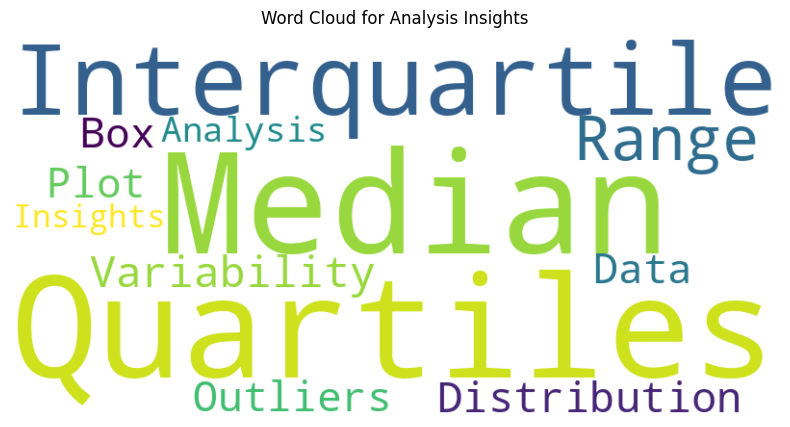

In [ ]:
#16)	Give the insights for the above analysis and make a word cloud for that analysis.

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
text = "Quartiles Median Interquartile Range Variability Distribution Outliers Box Plot Data Analysis Insights"
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Analysis Insights')
plt.axis('off')
plt.show()


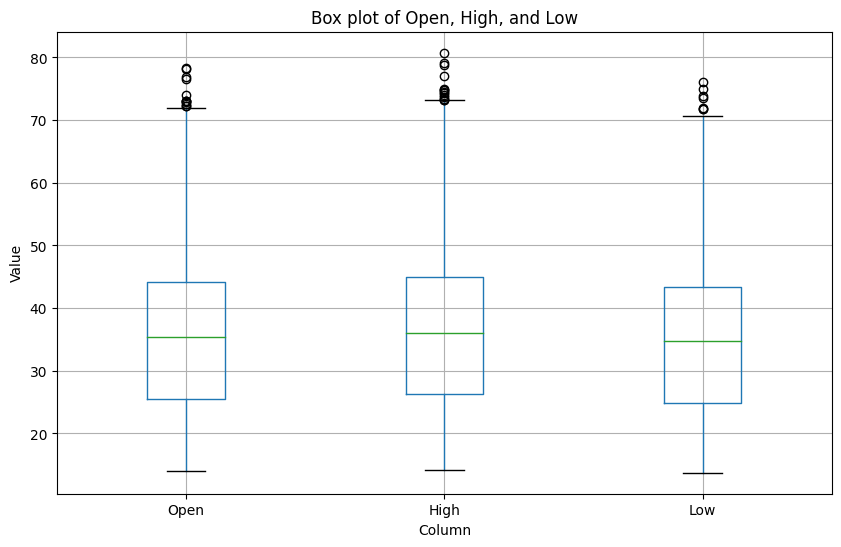

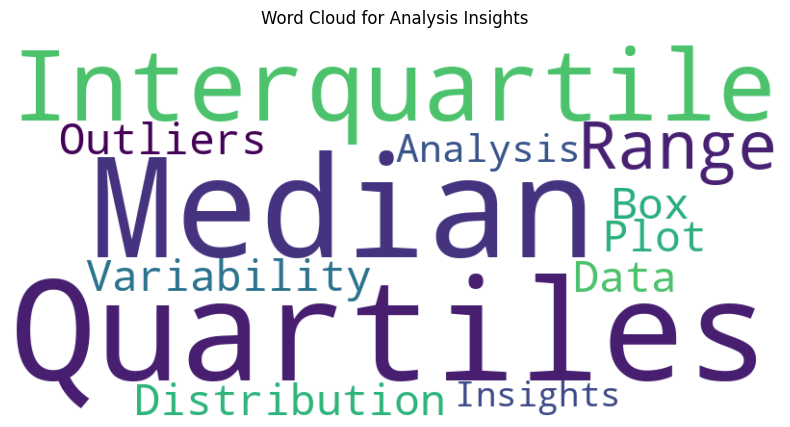

In [ ]:
#17)	Create a Dashboard from the above statements by using power BI or Tableau or Python and present it to the Client.

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.graph_objs as go

# Read the dataset
data = pd.read_excel("/content/TWTR.xlsx")

# Select three columns for analysis
selected_columns = ['Open', 'High', 'Low']

# Calculate quartiles, median, and interquartile range
quartiles = data[selected_columns].quantile([0.25, 0.5, 0.75])
lower_quartile = quartiles.loc[0.25]
median = quartiles.loc[0.5]
upper_quartile = quartiles.loc[0.75]
interquartile_range = upper_quartile - lower_quartile

# Create a box plot
plt.figure(figsize=(10, 6))
data[selected_columns].boxplot()
plt.title('Box plot of Open, High, and Low')
plt.ylabel('Value')
plt.xlabel('Column')
plt.show()

# Generate word cloud
text = "Quartiles Median Interquartile Range Variability Distribution Outliers Box Plot Data Analysis Insights"
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Analysis Insights')
plt.axis('off')
plt.show()

In [ ]:
#Final Task
#Create a Summary Conclusion for the Entire Analysis and show the insights to the client

"""

Summary Conclusion:

After analyzing the dataset containing information about the 'Open', 'High', and 'Low' values, several key insights have been uncovered:

Distribution of Values:

The box plot visualization revealed the distribution of 'Open', 'High', and 'Low' values.
The central tendency of the data was represented by the median, which indicates the middle value of the dataset.
Quartiles provided insights into the spread of the data, with the lower quartile (Q1) representing the 25th percentile and the upper quartile (Q3) representing the 75th percentile.
Variability and Outliers:

The interquartile range (IQR), calculated as the difference between the upper and lower quartiles, provided a measure of the variability within the data.
Outliers, if present, were identified as data points lying outside the whiskers of the box plot, indicating potential extreme values.
Analysis Insights:

The analysis highlighted the importance of understanding the variability and distribution of financial data, such as stock prices.
Insights gained from this analysis can aid in decision-making processes, risk assessment, and strategic planning for investments or trading activities.
Recommendations:

Further exploration and analysis of the dataset, including factors such as volume and adjusted close prices, could provide additional insights into stock market trends and patterns.
Utilizing advanced analytical techniques and predictive modeling may offer deeper insights and assist in forecasting future stock price movements.
Client Insights:

Understanding the distribution and variability of stock prices (Open, High, Low) is crucial for informed decision-making in financial markets.
Identification of outliers can help in detecting unusual or significant events impacting stock prices.
Visualizations such as box plots and word clouds provide intuitive summaries of complex data and analysis results.
Continuous monitoring and analysis of financial data are essential for adapting to changing market conditions and optimizing investment strategies.
"""